# Clustering using Insurance Dataset (Medical Charge) 
As we know a few information about the data or the result of unsupervised learning, it has more difficult algorithms in comparison to supervised learning.  Dimension reduction, density estimation, clustering, etc are the most widely used unsupervised machine learning techniques. In this work, we will apply clustering algorithms to the Insurance dataset.

Clustering is used for grouping data points, that are somehow similar. It has many applications in different fields, for example, a bank's desire to group the customers based on characteristics like transaction and deposit time. Generally speaking, clustering is used mostly for un-hiding the data structure, summarization, and anomaly detection. 

# About the Insurance Dataset
Health insurance which covers the whole or a part of the risk of a person incurring medical expenses, spreading the risk over a large number of persons. Investigation of such database could be useful for both insurance companies and also customers. This data set is in `CSV format` has 1338 data points. It contains the age, Sex, BMI, no. of children, smoking or not, the residential area and Medical charge for every sample.
<br />Based on our experience, we might have some prejudice about these attributes. For example, a higher value of BMI or smoking could increase the chance of becoming ill. But in the first step of any analysis, we must free the mind from any prejudice!


<img src="Figures/Example.JPG" height="1500" width="1000">

# Methodology
We will apply `Exploratory Data Analysis` to be familiarized with the data. Then, we will implement `K-Means` and `Hierarchical` algorithms to divide the data point to some group with similar properties. 

# Exploratory Data Analysis

At first, all required libraries are imported.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

The dataset will be imported and save as a dataframe.

In [2]:
# Import Data
df=pd.read_csv("Source/insurance.csv")

The below table shows the content of the data set which we have described in the dataset section.

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To have a glance at the dataset, `describe` method will be used. 
<br>Based on the result, the average age of people in this dataset is around 39 years and the average BMI is 30.6 which is more than the normal (obese)! The average number of children is around 1 which generally means people have 1 or no child. The average medical cost is around 13000 USD. 
Some studies reveal that BMI might not a good indicator of healthy condition. This might affects our analysis. However, there is no other indicator so, we will consider BMI as one of the attributes.  

In [4]:
# Dataset Overall Review
df.describe(include = 'all') 

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Distribution of BMI, age and, charges
The next figure presents the distribution plot of BMI, Age and Medical Charges which shows the spread (dispersion, variability) of these attributes. 
* BMI has a bell shape or normal distribution (Symmetric)
* Age distribution without considering the first data points is almost uniform. 
* Charges distribution shows the lower number of data points are found toward the larger numeric values. The "tail" of the graph is pulled toward higher positive numbers which is called Skewed Right. It also shows a bimodal distribution. We will find the cause of this kind of distribution.

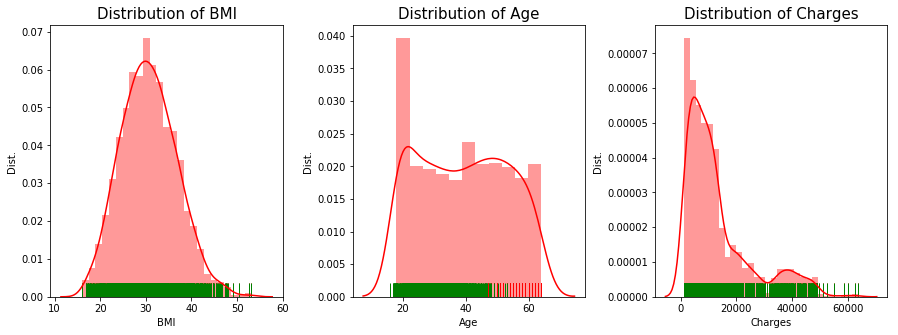

In [5]:
# Distribution plot
ax=plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)

#BMI
# Plot a univariate distribution of observations.
ax = sns.distplot(df['bmi'], rug=True, color="r")
# Plot data point on the axis
sns.rugplot(df['bmi'], color="g")
ax.set_title('Distribution of BMI', fontsize = 15)
ax.set_xlabel('BMI')
ax.set_ylabel('Dist.')

# AGE
plt.subplot(1, 3, 2)
ax = sns.distplot(df['age'], rug=True, color="r")
sns.rugplot(df['bmi'], color="g")
ax.set_title('Distribution of Age', fontsize = 15)
ax.set_xlabel('Age')
ax.set_ylabel('Dist.')

# CHARGES
plt.subplot(1, 3, 3)
ax = sns.distplot(df['charges'], rug=True, color="r")
sns.rugplot(df['charges'], color="g")
ax.set_title('Distribution of Charges', fontsize = 15)
ax.set_xlabel('Charges')
ax.set_ylabel('Dist.')

plt.subplots_adjust(wspace=0.3)

## Distribution of gender, smoking, no. of children and residential area 
The below figure shows the relative contribution that different categories contribute to an overall total. The number of men and women are the same in the database. One-fifth of the population are smoker. The distribution of people living in North West, South West and  North East are equal but for South East, it is around 3 percent more. More than 65% of people in the dataset have no children or only one and around 1 percent have 5 children. 


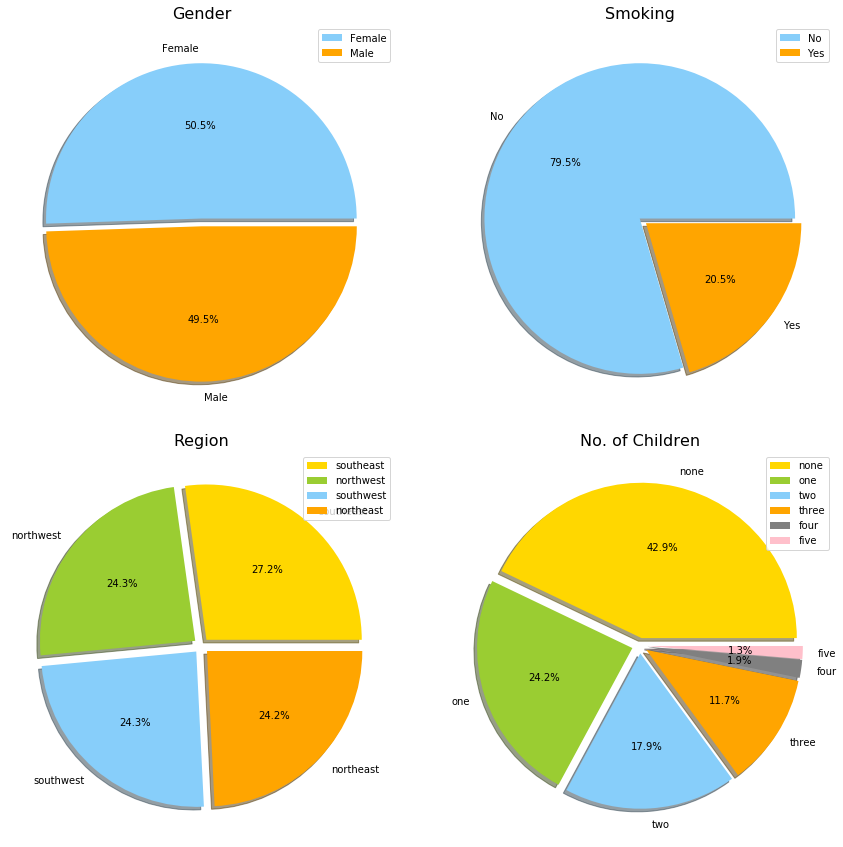

In [6]:
# Gender Distribution
plt.rcParams['figure.figsize'] = (15, 15)
plt.subplot(2, 2 , 1)
labels = ['Female', 'Male']
size = df['sex'].value_counts()
colors = ['lightskyblue', 'orange']
explode = [0, 0.05]
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Gender', fontsize = 16)
plt.axis('off')
plt.legend(loc="best")

# Smoking Distribution
plt.subplot(2, 2 , 2)
labels = ['No', 'Yes']
colors = ['lightskyblue', 'orange']
explode = [0, 0.05]
plt.pie(df['smoker'].value_counts(), colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Smoking', fontsize = 16)
plt.axis('off')
plt.legend(loc="best")

# Residental Area Distribution
plt.subplot(2, 2 , 3)
labels = ['southeast',  'northwest',  'southwest',    'northeast' ]
colors = ['gold', 'yellowgreen','lightskyblue', 'orange']
explode = [0.05, 0.05, 0.05, 0.05]
plt.pie(df['region'].value_counts(), colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Region', fontsize = 16)
plt.axis('off')
plt.legend(loc="best")

# No. of Children Distribution
plt.subplot(2, 2 , 4)
labels = ['none', 'one', 'two', 'three', 'four', 'five' ]
colors = ['gold', 'yellowgreen','lightskyblue', 'orange','grey', 'pink']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.pie(df['children'].value_counts(), colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('No. of Children', fontsize = 16)
plt.axis('off')
plt.legend(loc="best")

# Adjust spaces between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

The primary question raised regarding these statistics. Are they related to the cost of medical services? (remember the shape of charge distribution). Are gender and smoking affect the charges? What about women who smoking and living in a specific area like Southwest. There might be some contaminated areas which also increase the risk of becoming ill.     

## Definition of new columns
Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. It is defined as the body mass divided by the square of the body height. Different categories defined based on the BMI value. There are 11 categories which based on the number of samples in the dataset and their ranges, it summaries to 4 categories: Underweight, Normal, Overnight and Obese.  


|Category| BMI min|BMI max|
| :------------- |:-------------:| -----:|
|<font color='blue'>Very severely underweight|<font color='blue'>	-|<font color='blue'>	15|		
|<font color='blue'>Severely underweight	|<font color='blue'>15	|<font color='blue'>16|	
|<font color='blue'>Underweight|<font color='blue'>	16|<font color='blue'>	18.5|	
|<font color='green'>Normal |<font color='green'>	18.5|<font color='green'>	25|	
|<font color='orange'>Overweight|<font color='orange'>	25|<font color='orange'>	30|
|<font color='red'>Obese Class I (Moderately obese)|<font color='red'>	30|<font color='red'>	35|	
|<font color='red'>Obese Class II (Severely obese)|<font color='red'>	35|<font color='red'>	40|	
|<font color='red'>Obese Class III (Very severely obese)|<font color='red'>	40|<font color='red'>	45|	
|<font color='red'>Obese Class IV (Morbidly Obese)|<font color='red'>	45|<font color='red'>	50	|
|<font color='red'>Obese Class V (Super Obese)|<font color='red'>	50|<font color='red'>	60|	
|<font color='red'>Obese Class VI (Hyper Obese)|<font color='red'>	60|<font color='red'>-|	

The column  `BMIcat` will be added to the data frame which shows the category of BMI that samples belong to. 

In [7]:
df['BMIcat'] = np.where(df['bmi']<18.5, 'underweight', '')
df['BMIcat'] = np.where(df['bmi']>=18.5, 'normal', df['BMIcat'])
df['BMIcat'] = np.where(df['bmi']>=25, 'overweight', df['BMIcat'])
df['BMIcat'] = np.where(df['bmi']>=30, 'obese', df['BMIcat'])

The ages are divided into two categories of Below and Above 55 years old. Also, another column is added two show the combination age categories and smoking. These two columns are also added to the dataframe with names of `whatAge` and `whatAge&smoking`.

In [8]:
df['whatAge'] = np.where(df['age']>=55, 'Above55', 'Below55')
df['whatAge&smoking'] = np.where((df['whatAge']=='Below55') & (df['smoker']=='no'), "Below55_notSmoker","")
df['whatAge&smoking'] = np.where((df['whatAge']=='Below55') & (df['smoker']=='yes'), "Below55_Smoker",df['whatAge&smoking'])
df['whatAge&smoking'] = np.where((df['whatAge']=='Above55') & (df['smoker']=='no'), "Above55_notSmoker",df['whatAge&smoking'])
df['whatAge&smoking'] = np.where((df['whatAge']=='Above55') & (df['smoker']=='yes'), "Above55_Smoker",df['whatAge&smoking'])

The data frame (Last 5 rows) with three new columns is presented below

In [9]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges,BMIcat,whatAge,whatAge&smoking
1333,50,male,30.97,3,no,northwest,10600.5483,obese,Below55,Below55_notSmoker
1334,18,female,31.92,0,no,northeast,2205.9808,obese,Below55,Below55_notSmoker
1335,18,female,36.85,0,no,southeast,1629.8335,obese,Below55,Below55_notSmoker
1336,21,female,25.80,0,no,southwest,2007.9450,overweight,Below55,Below55_notSmoker
1337,61,female,29.07,0,yes,northwest,29141.3603,overweight,Above55,Above55_Smoker


## Distribution of age
The below figure shows the distribution of ages categories. Around 18 percent of people are above 55 years old.

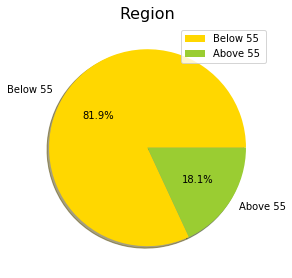

In [10]:
plt.subplot(1, 3, 3)
labels = ['Below 55 ', 'Above 55' ]
colors = ['gold', 'yellowgreen']
explode = [0, 0]
plt.pie(df['whatAge'].value_counts(), colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.1f%%')
plt.title('Region', fontsize = 16)
plt.axis('off')
plt.legend()


## Features relationship
The below figure shows the relationship between variables. Let's first take a look at plots at the bottom. These plots show the relationship between Charges versus age, BMI and no. of children.
The first plot shows the Charges versus Age. We can investigate the plot for above and below 55 years old. As it can be seen for above 55, smokers (red points) generally paid more in comparison to non-smokers (green points). Below 55 years old also,  smokers paid more. In both categories (Below and above 55) some samples of smokers and non-smokers medical charges are almost the same.
The second plot is Charges versus BMI values. Surprisingly, for both smokers below and above 55 years old the medical charge increases as increasing in BMI value. The majority of non-smokers medical charges are constant with increase in BMI values.   Also, non-smokers less than 55 years old have minimum charges. 
The third plot is Charges versus the number of children. Although there are no sufficient samples with 4 and 5 children, It can be concluded that smoking is an important factor in the increase in medical charges for each number of children. 



Text(0.5, 1.0, 'Pairplot')

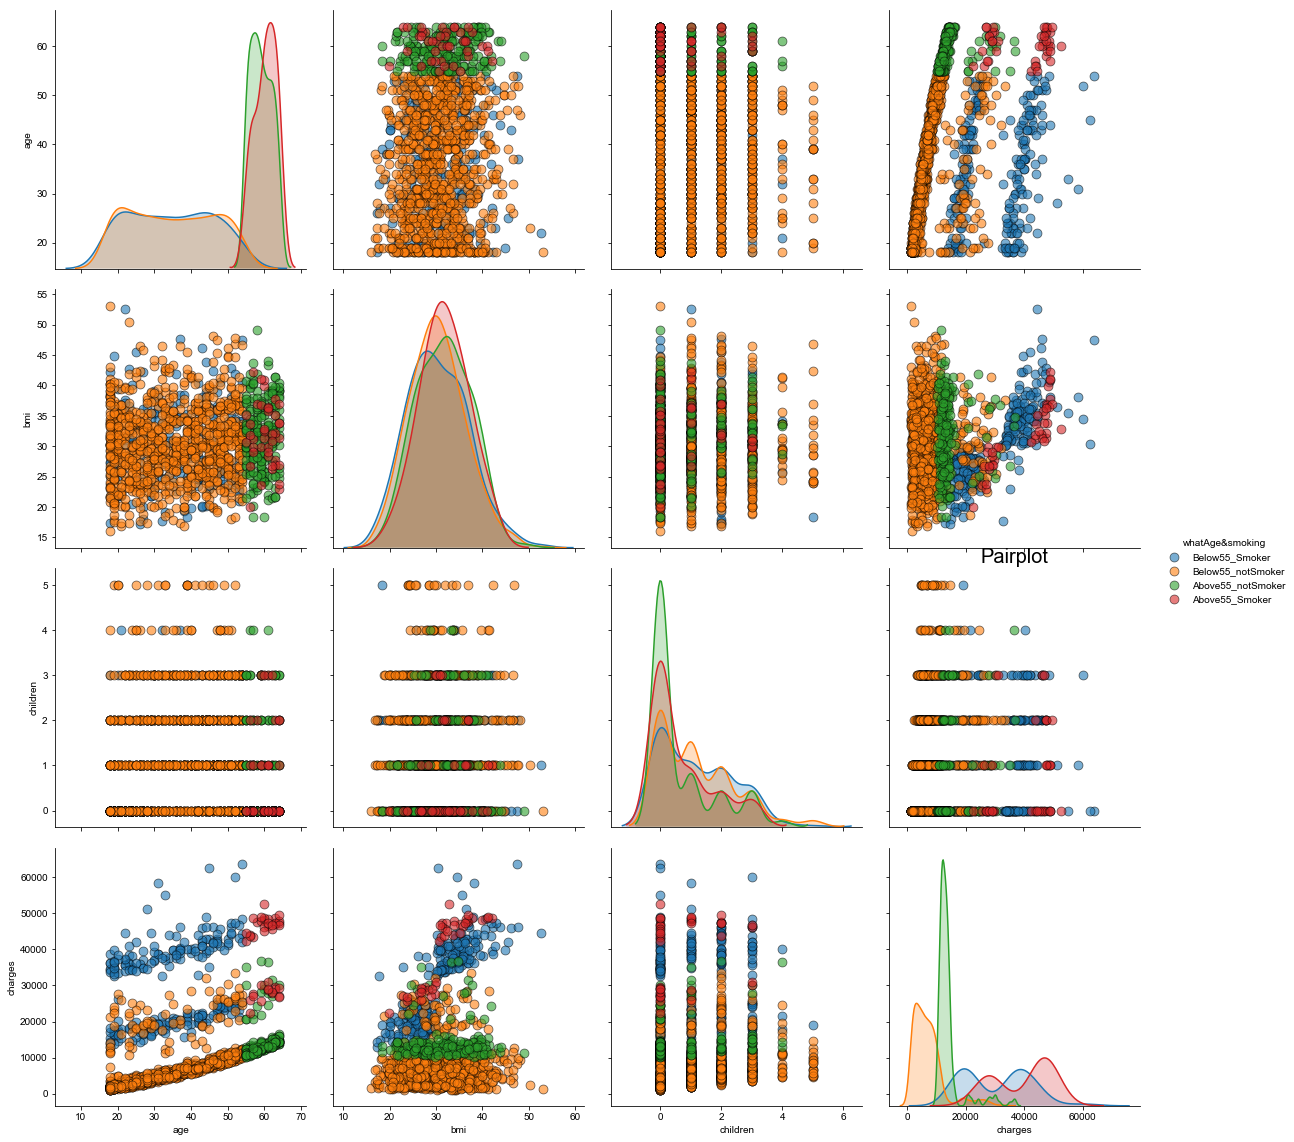

In [11]:
pp=sns.pairplot(df, diag_kind = 'kde',hue='whatAge&smoking',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
sns.set(style="ticks", color_codes=True)
plt.title('Pairplot', fontsize = 20)

Let's take a look at Charges versus age again. For both age categories, it seems some of the non-smokers charge the same as smokers. For better understanding, two plots (`lineplot` and `violonplot`) will be generated.  From line plot, it can be seen that the total average of charges is more for ages above 55 and the slope of the curve below 55 years old is higher than people more than 55 which is almost constant. Again it also clear that smokers paid more in both age categories. 


Text(0.5, 1.0, 'Charges vs Age above 55')

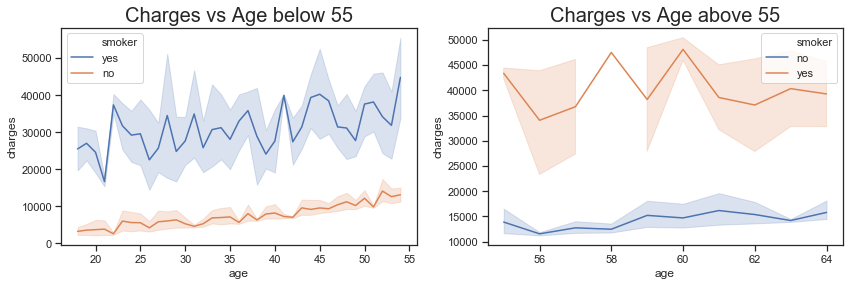

In [12]:
plt.rcParams['figure.figsize'] = (14, 4)
plt.subplot(1, 2, 1)
sns.lineplot(df["age"][df["age"]<55], df["charges"][df["age"]<55],hue=df["smoker"][df["age"]<55], color = 'blue')
plt.title('Charges vs Age below 55', fontsize = 20)

plt.rcParams['figure.figsize'] = (18, 8)
plt.subplot(1, 2, 2)
sns.lineplot(df["age"][df["age"]>=55], df["charges"][df["age"]>=55],hue=df["smoker"][df["age"]>=55], color = 'blue')
plt.title('Charges vs Age above 55', fontsize = 20)


## ٍEffects of BMI categories, age and, smoking on charges 
The box plot is convenient for comparing summary statistics (such as range and quartiles), but it doesn't let you see variations in the data. Generally, violin plot (a hybrid of a box plot and a kernel density plot) is used to shows the distribution of quantitative data across several levels of one (or more) categorical variables like BMI categories.
<br> 
<br>A violin plot shows the distribution’s density using the width of the plot, which is symmetric about its axis, while traditional density plots use height from a common baseline. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability. The shape of the distribution indicates the charges of all are highly concentrated around the median.
<br>
<br>As you can see the medians of non-smokers for different BMI categories below 55 years old are the same and lower than smokers which also have a variation. For non-smokers, only the outliers are equal to the cost of smokers. So, the overlap that we have seen in the pair plot (Charges versus age) is not important. Also, for people more than 55 years old we see the same trend for BMI categories.
<br>
<br>The voilin plot shows that the cost for people in obese categories is generally higher. While costs for normal weight and overweight are the same in ages below 55, This is more for overweight in ages more than 55.
<br>
<br>The plot also confirms that the cost for the smoker in the obese category and above 55 years old is much higher.  

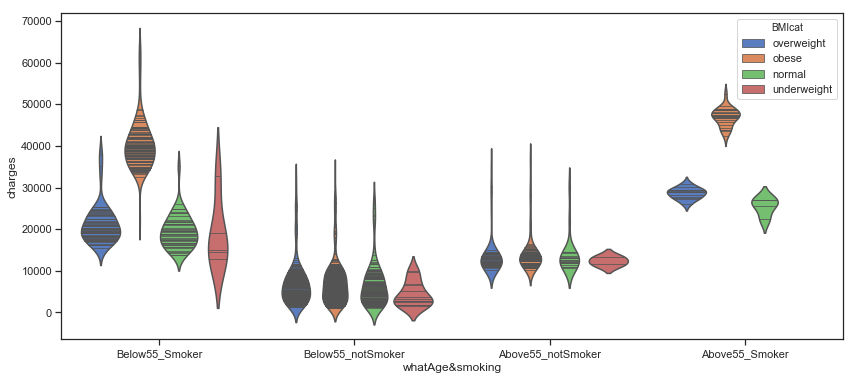

In [13]:
plt.rcParams['figure.figsize'] = (14, 6)
ax = sns.violinplot(x="whatAge&smoking", y="charges", data=df,hue="BMIcat",palette="muted", inner="stick")

## Correlation for different BMI categories
In the next, the correlation between attributes (age, BMI, children and, charges) will be analyzed using `heat map`. The correlation will be generated for different categories of BMI. One interesting point is that the correlation is weaker as we move from underweight to obese. For example, Age and BMI have a correlation of 0.66 in the case of underweight while the correlation coefficient is 0.048 in the obese category. The more a person gains weight, the harder the prediction of costs becomes!  

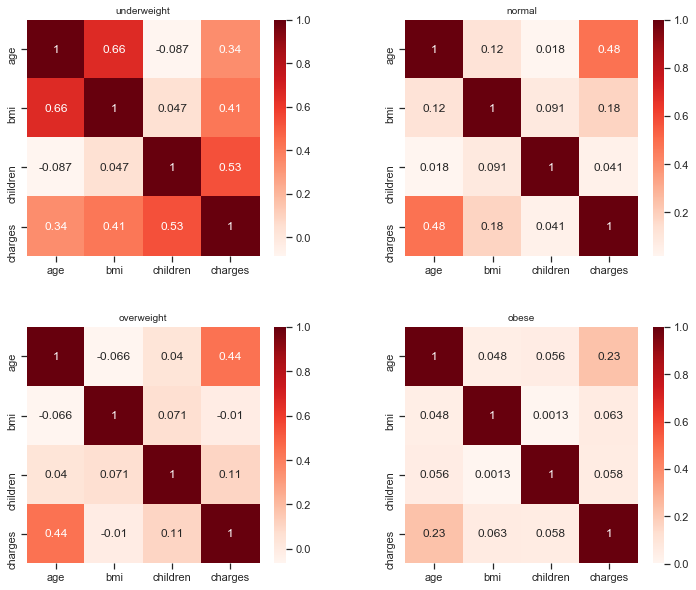

In [14]:
plt.rcParams['figure.figsize'] = (12, 10)
WhatBMIcat=['underweight', 'normal', 'overweight','obese']
for i in range(0,4):
 plt.subplot(2, 2, i+1)
 sns.heatmap(df[df['BMIcat']==WhatBMIcat[i]].corr(), annot = True,cmap = 'Reds')
 plt.title(WhatBMIcat[i], fontsize = 10)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Effect of gender on charges
It is also a good try to investigate the charges based on gender. As can be seen the median, first quartile, outliers are the same. The only difference is the third quartile which generally shows that men paid more for medical charges. Is it related to the genetic difference, smoking, etc.?
<br>
<br>The second violin plot with the quartiles as horizontal lines shows long-tail distribution above the third quartile for all except smokers above 55 years old. For non-smokers, the plot shows that female paid a little more than men in two age categories which might be due to genetic, disease type difference.
<br>
<br>For better understanding, the third violin plot is plotted for different BMI categories of non-smokers. As can be seen, female charge for all BMI categories is more than male.     

Text(0.5, 1.0, 'Non-smokers Charges vesus Sex')

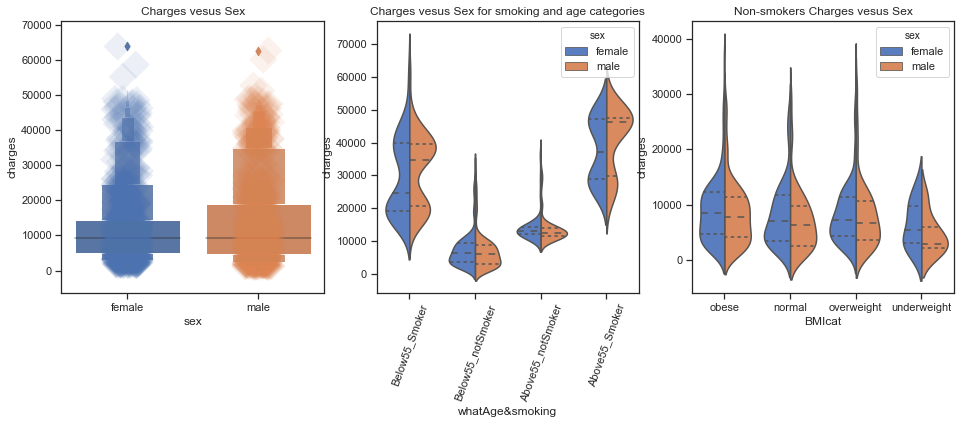

In [15]:
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 3, 1)
sns.boxenplot(df['sex'], df['charges'])
sns.stripplot(df['sex'], df['charges'], size=20, marker="D", edgecolor="gray", alpha=.1)
plt.title('Charges vesus Sex', fontsize = 12)
plt.subplot(1, 3, 2)
plt.title('Charges vesus Sex for smoking and age categories', fontsize = 12)
ax = sns.violinplot(x="whatAge&smoking", y="charges", data=df,hue="sex",palette="muted", inner="quartile", split=True)
plt.xticks( rotation=70)
plt.subplot(1, 3, 3)
ax = sns.violinplot(df['BMIcat'][df['smoker']=='no'], df['charges'][df['smoker']=='no'], data=df,hue="sex",palette="muted", inner="quartile", split=True)
plt.title('Non-smokers Charges vesus Sex', fontsize = 12)

## Effect of Resident Area on charges


Different parameters can affect the charge of medical services based on the residential area. Pollution would be one of these parameters. As it can be seen, the distribution for non-smokers (Below and above 55 years old) for all regions are almost the same.
<br>
<br>For smokers above and below 55, median values of charges for south regions are higher than north regions.

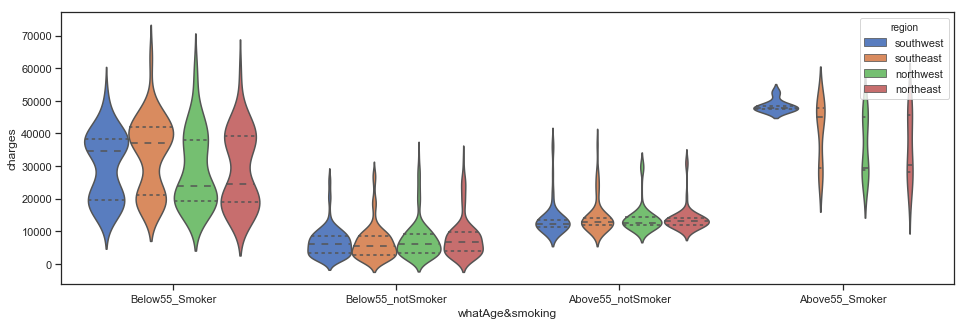

In [16]:
ax = sns.violinplot(x="whatAge&smoking", y="charges", data=df,hue="region",palette="muted", inner="quartile")

The next figure shows medical charges in male and female categories for all regions. As can be seen, the cost for male in south regions is more than female while in north regions female medical charges are more.

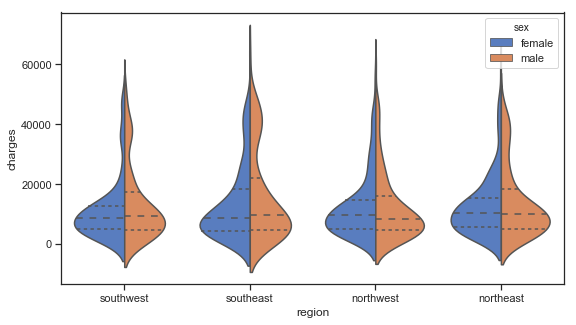

In [17]:
plt.figure(figsize=(9, 5))
sns.violinplot(x="region", y="charges", data=df,hue="sex",palette="muted", inner="quartile",  split=True)

# Clustering Algorithms

Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. Data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Then, we can create a profile for each group, considering the common characteristics of each cluster. 
Generally, clustering can be used for the following purposes:
* Exploratory data analysis 
* Summary generation 
* Outlier detection
* Finding duplicates

## K-Means method

K-Means is a type of partitioning clustering which divides the data into K non-overlapping sphere-like clusters without any labels. It is relatively efficient on medium to large-sized data sets. This method tries to minimize intra-cluster distances and maximize the inter-cluster distances.
To know how are the data points in a cluster, we need to use dissimilarity measures such as Euclidean distance or Average distance.
The K means algorithm steps are as follow:

 1. _Randomly Initialize centroids (representative points of each cluster)_
 2. _Distance calculation (Distance Matrix as a dissimilarity measure) to find the nearest centroid to data points_
 3. _Assign each point to the nearest centroid_
 4. _Update the centroids for every cluster_
 5. _Repeat until there is no more change (move the centroids, calculate the distances from new centroids and assign data points to the nearest centroid)_
<br> 
<br>There is no guarantee that the algorithm will converge to the global optimum. In other words, the result may depend on the initial clusters. To solve this problem, it is common to run the whole process multiple times with different starting conditions. One way to calculate the accuracy of k-Means clustering is to compare the clusters with the ground truth. However, because k-Means is an unsupervised algorithm we usually don't have ground truth in real-world problems. Examining the average distance is also another way to say how the accuracy of the cluster is. It is defined as the average distance between data points within a cluster. Also, the average of the distances of data points from their cluster centroids can be used as a metric of error for the clustering algorithm.
<br>
<br>One drawback of K-Means method is the problem of choice of K. It's very dependent on the shape and scale of the distribution of points in a dataset. In the elbow method, the value of the metric (mean distance of data points from cluster centroid) as a function of K is plotted. The plot is determined where the rate of decrease sharply changes which can be considered as the best number of clusters.
<br>
<br>In the next step, the `kmeans_method` is defined to both finding the best k and applying the K-Means method. After finding the best K from the first plot, the second plot shows the corresponding clustering using K-Means method.

In [18]:
def kmeans_method(df,n_cluster_f,inputcols_index):
 input=df.iloc[:, [inputcols_index[0], inputcols_index[1]]].values

 fig = plt.figure(figsize=(16,4)) 
 plt.subplot(1, 2, 1)
 # within-cluster sum of squares (WCSS)
 wcss = []
 for n_cluster in range(1, 10):
    kmeans = KMeans(n_cluster, random_state = 0)
    kmeans.fit(input)
    wcss.append(kmeans.inertia_)
 plt.plot(range(1, 10), wcss)
 plt.title('The Elbow Method', fontsize = 20)
 plt.xlabel('Number of Clusters')
 plt.ylabel('Within-cluster sum of squares')
           
 plt.subplot(1, 2, 2)
 kmeans = KMeans(n_cluster_f, random_state = 0)
 ymeans = kmeans.fit(input)
 plt.scatter(input[:,0], input[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
 plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
 plt.title("Kmeans Clustering", fontsize=20)
 plt.xlabel(df.columns[inputcols_index[0]])
 plt.ylabel(df.columns[inputcols_index[1]])   
 return

### K-Mean: Charges - Age


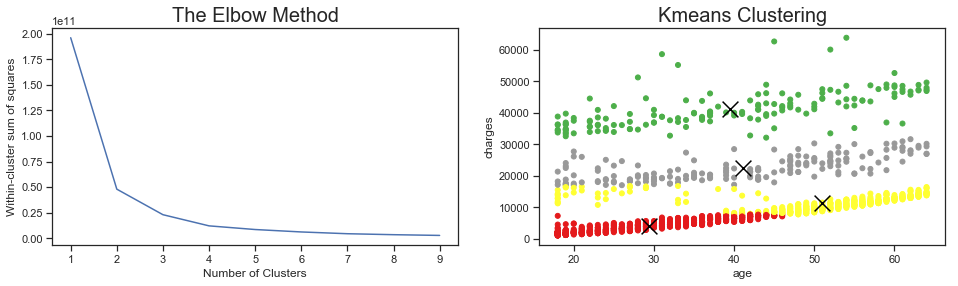

In [19]:
kmeans_method(df,4,[0,6])

### K-Mean: Charges - BMI
The plot shows the results of K-Means using BMI and Charges. As it can be seen, the algorithm is successful in dividing the data samples to smokers and non-smokers (see the pair plot)

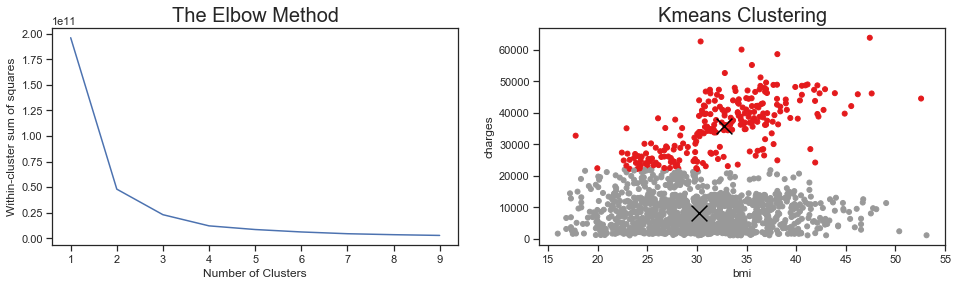

In [20]:
kmeans_method(df,2,[2,6])

## Hierarchical clustering (Agglomerative)
Hierarchical clustering algorithms build a hierarchy of clusters where each node is a cluster consisting of the clusters of its daughter nodes. There ate two types of Hierarchical clustering algorithms. Hierarchical clustering is typically visualized as a dendrogram.   
* Divisive (top down): start with all observations in a large cluster and break it down into smaller clusters
* Agglomerative (bottom up): each observation starts in its own cluster and pairs of clusters are merged together as they move up the hierarchy (more popular approach).
<br>

The advantages of hierarchical clustering are no need to specify the number of clusters, easy to implement and generated dendrogram is useful to understand the data. The main disadvantage of the algorithm is long computation times.

In [21]:
def Hierarchical_method(df,n_cluster_f,inputcols_index):
    
 input=df.iloc[:, [inputcols_index[0], inputcols_index[1]]].values

 plt.subplot(1, 2, 1)
 agglomerative_clustering = AgglomerativeClustering(n_cluster_f).fit(input)
 plt.scatter(input[:,0], input[:,1], c=agglomerative_clustering.labels_, cmap="Set1_r", s=25)
  
 plt.title("Hierarchical Clustering", fontsize=20)
 plt.xlabel(df.columns[inputcols_index[0]])
 plt.ylabel(df.columns[inputcols_index[1]]) 
           
 plt.subplot(1, 2, 2)
 link = linkage(agglomerative_clustering.children_, 'ward')
 dendrogram(link, orientation='top',labels=agglomerative_clustering.labels_,distance_sort='descending',show_leaf_counts=False,)   
   
 return

### Hierarchical : Charges - BMI
The plot shows the results of Hierarchical clustering using BMI and Charges. As can be seen, the algorithm is more successful in dividing the data samples to smokers and non-smokers in comparison to K-Mean method (see the pair plot). 

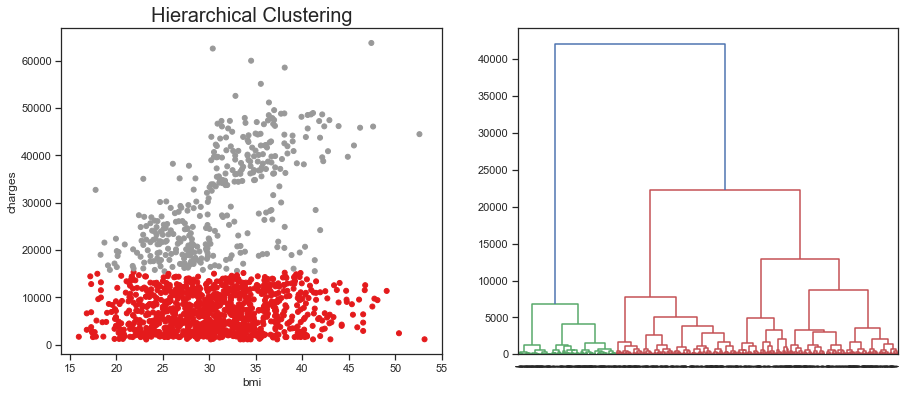

In [22]:
plt.figure(figsize=(15, 6))
Hierarchical_method(df,2,[2,6])

## Future Work (K-Mode algorithm)

The standard k-means algorithm isn't directly applicable to categorical data. One reason is the Euclidean distance function on such a space isn't really meaningful. Converting categorical attributes to binary values, and applying k-means is another approach but it is not recommended. The next solution lies in the k-modes algorithm which is an extension of k-means. Instead of distances, it uses dissimilarities (that is, quantification of the total mismatches between two objects and also instead of means, it uses modes. 
